# Name: Sumit Kumar Sah
# Roll: 39
# Group: CS(2nd year/2nd sem)



## Qn1. Implement the Bisection Method to approximate the root of the equation $ 𝑥^2= 𝑠𝑖𝑛𝑥 $ by taking the initial guesses 𝑎 = 0.5 𝑎𝑛𝑑 𝑏 = 1.0. (Algorithm: 𝒙𝟎 =(𝒂+𝒃)/2)


In [3]:
import numpy as np
import math
from prettytable import PrettyTable


def bisection(fn, a=0, b=100, error=0.001):

 # Check for correct intervals:
    if fn(a) * fn(b) > 0:
        return "Please choose another values for a and b"

 # creation of table
    table = PrettyTable(["a", "b", "mid", "f(mid)"])
    table.align = 'r'

 # Variable Declarations:
    mid = int()

 # Bisection:
    while True:
         prev_mid = mid
         mid = (a + b) / 2
         table.add_row([a, b, mid, round(fn(mid), 4)])

         if abs(mid - prev_mid) < error:
             return table
         elif fn(mid) > 0:
             b = mid
         else:
             a = mid
def function(x):
    return x**2 - np.sin(x)
print(bisection(function, a=0.5, b=1.0))

+-------+-------------+--------------+---------+
|     a |           b |          mid |  f(mid) |
+-------+-------------+--------------+---------+
|   0.5 |         1.0 |         0.75 | -0.1191 |
|  0.75 |         1.0 |        0.875 | -0.0019 |
| 0.875 |         1.0 |       0.9375 |  0.0728 |
| 0.875 |      0.9375 |      0.90625 |  0.0341 |
| 0.875 |     0.90625 |     0.890625 |  0.0157 |
| 0.875 |    0.890625 |    0.8828125 |  0.0068 |
| 0.875 |   0.8828125 |   0.87890625 |  0.0024 |
| 0.875 |  0.87890625 |  0.876953125 |  0.0003 |
| 0.875 | 0.876953125 | 0.8759765625 | -0.0008 |
+-------+-------------+--------------+---------+


 ## Qn.2) Implement the Newton-Raphson’s Method to approximate the root of the equation $𝑒^𝑥 = 4𝑥$ by taking the initial guess 𝑥0 = 1.0 (Algorithm: $ 𝒙𝟏 = 𝒙𝟎 −\frac{𝒇(x0)}{f'(x)} $

In [9]:
from math import exp
import pandas

def f(x):
    return exp(x) - 4*x
def df(x):
    return x*exp(x) - 4

# define newton-raphson method that takes initial guess(x) as parameter
def newton_raphson_method(x):
    x_list=[]
    y_list=[]
    
    while True:
        x_list.append(x)
        y_list.append(f(x))
        
        if f(x) == 0.0:
            break
        x = x - f(x)/df(x)
    
    dframe=pandas.DataFrame()
    dframe["x"]=x_list
    dframe["f(x)"]=y_list
    print(dframe)
    print("The root of equation is:", x)

# main function
if __name__ == "__main__":
    x = 1.0
    newton_raphson_method(x)


           x          f(x)
0   1.000000 -1.281718e+00
1   0.000000  1.000000e+00
2   0.250000  2.840254e-01
3   0.327202  7.827382e-02
4   0.349275  2.093944e-02
5   0.355250  5.538488e-03
6   0.356835  1.460069e-03
7   0.357253  3.845598e-04
8   0.357364  1.012629e-04
9   0.357393  2.666303e-05
10  0.357400  7.020394e-06
11  0.357402  1.848466e-06
12  0.357403  4.866997e-07
13  0.357403  1.281476e-07
14  0.357403  3.374115e-08
15  0.357403  8.884013e-09
16  0.357403  2.339152e-09
17  0.357403  6.158967e-10
18  0.357403  1.621649e-10
19  0.357403  4.269807e-11
20  0.357403  1.124234e-11
21  0.357403  2.960077e-12
22  0.357403  7.793766e-13
23  0.357403  2.051692e-13
24  0.357403  5.417888e-14
25  0.357403  1.421085e-14
26  0.357403  3.774758e-15
27  0.357403  1.110223e-15
28  0.357403  2.220446e-16
29  0.357403  0.000000e+00
The root of equation is: 0.3574029561813889


## Qn.3) Construct the finite difference table of the function $𝑓(𝑥) = 𝑒^𝑥$ on the interval −1 ≤ 𝑥 ≤ 1 by dividing the interval by equally space points of step-size 0.1

In [4]:
def difference_table(x, y, return_delta=False):
 # Table Definitions:
     n = len(x)
     dTable = np.zeros((n, n))
     dTable[:, 0] = y
 # Table Layout:
     column_names = ["Y", "△1", "△2", "△3", "△4", "△5", "△6", "△7", "△8", "△9", "△10"]
     table = PrettyTable(column_names)
     table.align = "r"
 # Generating Forward Difference Table
     for i in range(1, n):
         for j in range(0, n - i):
             dTable[j][i] = round(dTable[j + 1][i - 1] - dTable[j][i - 1], 4)
 # Output Structure
     num_columns = min(dTable.shape[1], 11)
     for row in dTable:
         row = row[:num_columns].copy()
         row.resize((11))
         table.add_row(row)
 # Returns
     if not return_delta:
         return table
     elif return_delta == "forward":
 # Returns n Forward Deltas, default=5
         n = min(dTable.shape[1], 5 + 1)
         return dTable[0, 1:n]
     elif return_delta == "backward":
 # Returns n Backward Deltas, default=5
         n = min(dTable.shape[1], 6)
         j = 1
         del_Y = []
         for i in range(dTable.shape[0] - 1, dTable.shape[0] - n, -1):
             del_Y.append(dTable[i - 1, j])
             j += 1
         return del_Y
x = np.linspace(-1, 1, 21)
y = np.exp(x).round(4)
print(difference_table(x,y))

+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+
|      Y |     △1 |     △2 |     △3 |      △4 |      △5 |      △6 |      △7 |      △8 |      △9 |     △10 |
+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+
| 0.3679 | 0.0387 |  0.004 | 0.0006 | -0.0003 |  0.0006 | -0.0009 |  0.0012 | -0.0014 |  0.0014 | -0.0011 |
| 0.4066 | 0.0427 | 0.0046 | 0.0003 |  0.0003 | -0.0003 |  0.0003 | -0.0002 |     0.0 |  0.0003 | -0.0008 |
| 0.4493 | 0.0473 | 0.0049 | 0.0006 |     0.0 |     0.0 |  0.0001 | -0.0002 |  0.0003 | -0.0005 |  0.0011 |
| 0.4966 | 0.0522 | 0.0055 | 0.0006 |     0.0 |  0.0001 | -0.0001 |  0.0001 | -0.0002 |  0.0006 | -0.0014 |
| 0.5488 | 0.0577 | 0.0061 | 0.0006 |  0.0001 |     0.0 |     0.0 | -0.0001 |  0.0004 | -0.0008 |  0.0005 |
| 0.6065 | 0.0638 | 0.0067 | 0.0007 |  0.0001 |     0.0 | -0.0001 |  0.0003 | -0.0004 | -0.0003 |  0.0037 |
| 0.6703 | 0.0705 | 0.0074 |

## Qn.4 Estimate the value of the function 𝑓(0.21) and 𝑓(0.29) applying Newton’s forward and backward interpolation polynomials using following table: 

## Forward Interpolation

In [10]:
def forward_interop(x_pred):
 # Data:
 x = np.array([0.20, 0.22, 0.24, 0.26, 0.28, 0.30])
 y = np.array([1.6596, 1.6698, 1.6804, 1.6912, 1.7024, 1.7139])
 # Calculating h and p:
 h = x[1] - x[0]
 p = (x_pred - x[0]) / h
 # Forward Differences From Table:
 del_Y = difference_table(x, y, return_delta="forward")
 # Forward Interpolation Polynomial (upto △ 5)
 y_pred = (
     y[0]
     + del_Y[0] * p
     + del_Y[1] * p * (p - 1) / math.factorial(2)
     + del_Y[2] * p * (p - 1) * (p - 2) / math.factorial(3)
     + del_Y[3] * p * (p - 1) * (p - 2) * (p - 3) / math.factorial(4)
     + del_Y[4] * p * (p - 1) * (p - 2) * (p - 3) * (p - 4) / math.factorial(5)
 )
 return y_pred
print(f"f(0.21) = {forward_interop(0.21)}")
print(f"f(0.29) = {forward_interop(0.29)}")

f(0.21) = 1.6646027343749996
f(0.29) = 1.708149609375


## Backward interpolation

In [11]:
def backward_interop(x_pred):
 # Data:
 x = np.array([0.20, 0.22, 0.24, 0.26, 0.28, 0.30])
 y = np.array([1.6596, 1.6698, 1.6804, 1.6912, 1.7024, 1.7139])
 # Calculating h and p:
 h = x[1] - x[0]
 p = (x_pred - x[-1]) / h
 # Backward Differences From Table:
 del_Y = difference_table(x, y, return_delta="backward")
 # Forward Interpolation Polynomial (upto △ 5)
 y_pred = (
        y[-1]
        + del_Y[0] * p
        + del_Y[1] * p * (p + 1) / math.factorial(2)
        + del_Y[2] * p * (p + 1) * (p + 2) / math.factorial(3)
        + del_Y[3] * p * (p + 1) * (p + 2) * (p + 3) / math.factorial(4)
        + del_Y[4] * p * (p + 1) * (p + 2) * (p + 3) * (p + 4) / math.factorial(5)
 )
 return y_pred
print(f"f(0.21) = {backward_interop(0.21)}")
print(f"f(0.29) = {backward_interop(0.29)}")

f(0.21) = 1.664602734375
f(0.29) = 1.7081496093750002


## Qn. 5. Estimate 𝑦(2) from the following data using Lagrange’s formula

In [11]:
x = [0,1,3,4,5]
y = [0,1,81,256,625]

# Reading interpolation point
xp = 2

# Set interpolated value initially to zero
yp = 0

# Implementing Lagrange Interpolation
for i in range(5):

    p = 1

    for j in range(5):
        if i != j:
            p = p * (xp - x[j])/(x[i] - x[j])

    yp = yp + p * y[i]    

# Displaying output
print('Interpolated value at %.3f is %.3f.' % (xp, yp))   

Interpolated value at 2.000 is 16.000.


## Qn.6) Implement Trapezoidal-rule to approximate the definite integral $\int_0^𝜋$ $\frac{sinx}{e^x}$ dx by taking 20-equal divisions of the interval [0, 𝜋]. (Algorithm: 𝑰 =$\frac{𝒉}{𝟐}[𝒚𝟎 + 𝟐(𝒚𝟏 + 𝒚𝟐 + ⋯ + 𝒚𝒏−𝟏)+ 𝒚𝒏])$   


In [5]:
def trapezoidal(fn, a=0, b=1000, num=20):
 h = float(b - a) / num
 I = fn(a) + fn(b)
 for i in range(1, num):
    I += 2 * fn(a + (i * h))
 return (h / 2) * I
def function(x):
  return np.sin(x)/np.exp(x)
trapezoidal(function, a=0, b=np.pi, num=20)

0.5194637027711455

## On.7)  Implement Simpson’s 1/3-rule to approximate the definite integral 𝐼 =$sqrt(1/2𝜋)$$\int_-4^4$ $e^-\frac{x^2}{2}$dx by taking 50-equal divisions of the interval [−4, 4]. (Algorithm: 𝑰 =$\frac{𝒉}{𝟑} $[𝒚𝟎 + 𝟒(𝒚𝟏 + 𝒚𝟑 + ⋯ + 𝒚𝒏−𝟏)+𝟐(𝒚𝟐 + 𝒚𝟒 + ⋯ + 𝒚𝒏−𝟐)+ 𝒚𝒏])

In [11]:
from math import exp, sqrt, pi
import numpy as np

#taking 50 equall division
n= 50  

intervals = np.linspace(-4, 4, 51)
h = intervals[1] - intervals[0]

y = list()
for i in intervals:
    y.append(sqrt(1/(2*pi)) * exp(i**2/2))

odd_sum = np.sum(y[1:-1:2])
even_sum = np.sum(y[2:-1:2])
I = (h/3)*(y[0]+y[-1]+4*odd_sum+2*even_sum)

print(I)


643.7424762150479


## Qn.8) Implement Euler’s method to approximate the solution 𝑦(𝑥) of the differential equation $𝑑𝑦/𝑑𝑥= 𝑥^2 +𝑥$, 𝑦(0) = 1 on the interval[0,2] by diving it into 20- equal sub-intervals. [Algorithm: 𝒚𝒊+𝟏 = 𝒚𝒊 +𝒉𝒇(𝒙𝒊,𝒚𝒊)]

In [6]:
def euler(fn, a, b, y, steps):

 # Table Layout
 table = PrettyTable(["x", "slope", "y"])
 table.align = "r"
 # Step size
 h = (b - a) / steps
 # Euler
 for i in range(steps):
     slope = fn(a, y)
     y = round(y + h * slope, 4)
     a = round(a + h, 4)
     table.add_row([a, slope, y])
 return table
def function(x, y):
  return np.round(x ** 2 + x, 4)
table = euler(function, a=0, b=2, y=1, steps=20)
print(table)

+-----+-------+-------+
|   x | slope |     y |
+-----+-------+-------+
| 0.1 |     0 |   1.0 |
| 0.2 |  0.11 | 1.011 |
| 0.3 |  0.24 | 1.035 |
| 0.4 |  0.39 | 1.074 |
| 0.5 |  0.56 |  1.13 |
| 0.6 |  0.75 | 1.205 |
| 0.7 |  0.96 | 1.301 |
| 0.8 |  1.19 |  1.42 |
| 0.9 |  1.44 | 1.564 |
| 1.0 |  1.71 | 1.735 |
| 1.1 |   2.0 | 1.935 |
| 1.2 |  2.31 | 2.166 |
| 1.3 |  2.64 |  2.43 |
| 1.4 |  2.99 | 2.729 |
| 1.5 |  3.36 | 3.065 |
| 1.6 |  3.75 |  3.44 |
| 1.7 |  4.16 | 3.856 |
| 1.8 |  4.59 | 4.315 |
| 1.9 |  5.04 | 4.819 |
| 2.0 |  5.51 |  5.37 |
+-----+-------+-------+


## Qn 9) Implement Runge-Kutta 2nd order method to approximate the solution 𝑦(𝑥) of the differential equation $𝑑𝑦/𝑑𝑥= 𝑥^2 + 𝑥$, 𝑦(0)=1 on the interval [0, 2] by diving it into 10-equal sub-intervals. [Algorithm:𝒚𝒊+𝟏 = 𝒚𝒊 +𝟏/𝟐(𝒌𝟏 + 𝒌𝟐), 𝒘𝒉𝒆𝒓𝒆 𝒌𝟏 = 𝒉𝒇(𝒙𝟎,𝒚𝟎)𝒂𝒏𝒅 𝒌𝟐= 𝒉𝒇(𝒙𝟎+𝒉,𝒚𝟎+𝒌𝟏)]

In [7]:
def runge(fn, x0=0, y0=1, a=0, b=2, intervals=10):
 # Table Layout
 table = PrettyTable(["x", "y"])
 table.align = "r"
 # Variable Definitions
 intervals = np.linspace(a, b, intervals + 1)
 h = intervals[1] - intervals[0]
 y = [y0]
 # Runge
 for x in intervals[1:]:
     x0 = x
     k1 = h * fn(x0, y[-1])
     k2 = h * (fn((x0 + h), (y[-1] + k1)))
     yi = y[-1] + 1 / 2 * (k1 + k2)
     y.append(yi)
     table.add_row([round(x, 4), round(y[-1], 4)])
 return table
def function(x, y):
  return np.round(x ** 2 + x, 4)
print(runge(function, x0=0, y0=1, a=0, b=2, intervals=10))

+-----+-------+
|   x |     y |
+-----+-------+
| 0.2 |  1.08 |
| 0.4 | 1.232 |
| 0.6 | 1.472 |
| 0.8 | 1.816 |
| 1.0 |  2.28 |
| 1.2 |  2.88 |
| 1.4 | 3.632 |
| 1.6 | 4.552 |
| 1.8 | 5.656 |
| 2.0 |  6.96 |
+-----+-------+


## Qn 10) Implement the Boundary valued second order differential equation 𝑦" − 64𝑦′ + 10 = 0 by using finite different method with boundary conditions 𝑦(0)= 𝑦(1) = 0 and taking the step size ℎ =0.1. 

     xi      yi
0   0.0     0.0
1   0.1  -998.0
2   0.2     2.0
3   0.3     2.0
4   0.4     2.0
5   0.5     2.0
6   0.6     2.0
7   0.7     2.0
8   0.8     2.0
9   0.9  5302.0
10  1.0     0.0


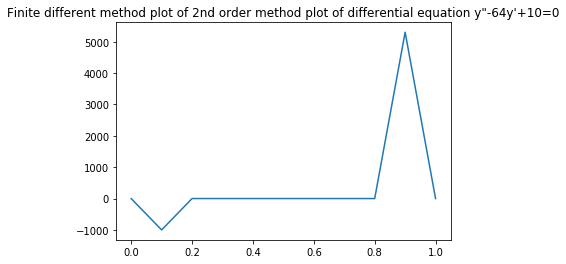

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

def f(x):
    if x == 0:
        return 0
    elif x == 1:
        return 0
    else:
        return x**2-64*x+10

xi = np.arange(0,1.1,0.1)
h = 0.1

yi = list()
yi.append(0)
for i in xi[1:-1]:
    y = (f(i+h)-2*f(i)+f(i-h))/h**2
    yi.append(y)
yi.append(0)

df = pd.DataFrame()
df["xi"]= xi
df["yi"] = yi
print(df)    

plt.plot(xi, yi)
plt.title('''Finite different method plot of 2nd order method plot of differential equation y"-64y'+10=0''')
plt.show()


## Q No. 11 Using least square method to fit the straight line y = a0 + a1x and predicting y=f(2.5)

In [8]:
def linear_predict(x_pred):
     x = np.array([1, 2, 3, 4, 5, 6])
     y = np.array([2.4, 3.1, 3.5, 4.2, 5.0, 6.0])

     # Equation Variables:
     a1 = len(x)
     b1 = x.sum()
     c1 = y.sum()
     a2 = x.sum()
     b2 = sum(x**2)
     c2 = sum(x*y)

     # Matrix Representation of equations:
     A = np.array([[a1, b1],
        [a2, b2]])
     b = np.array([c1, c2])

     # Solve Equations:
     a0, a1 = np.linalg.solve(A, b)

     # Predict:
     return a0 + (a1 * x_pred)
linear_predict(x_pred=2.5)

3.3361904761904757

## QNo. 12 Using least square method to fit the curve $y = ae^(bx)$ and estimating y=f(9)

In [9]:
def exp_predict(x_pred):

 # Data:
 x = np.array([2, 4, 6, 8, 10])
 y = np.array([4.077, 11.084, 30.128, 81.897, 222.62])

 # Equation Variables:
 a1 = len(x)
 b1 = x.sum()
 c1 = sum(np.log(y))
 a2 = x.sum()
 b2 = sum(x**2)
 c2 = sum(x*np.log(y))

 # Matrix Representation of equations:
 A = np.array([[a1, b1],
 [a2, b2]])
 b = np.array([c1, c2])

 # Solve Equations:
 a0, a1 = np.linalg.solve(A, b)

 # Predict:
 return np.exp(a0) * np.exp(a1 * x_pred)
exp_predict(9)

135.02702592434287